# RAMP on predicting cyclist traffic in Paris

Authors: *Roman Yurchak (Symerio)*; also partially inspired by the air_passengers starting kit.


## Introduction

The dataset was collected with cyclist counters installed by Paris city council in multiple locations. It contains hourly information about cyclist traffic, as well as the following features,
 - counter name
 - counter site name
 - date
 - counter installation date
 - latitude and longitude
 
Available features are quite scarce. However, **we can also use any external data that can help us to predict the target variable.** 

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [6]:
data_train = pd.read_parquet(Path("/Users/dnn/Data Science for Business 23-25/Master 1 - X/Python for Data Science/Sam_Solal_projet/data/train.parquet"))

In [7]:
data_train

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585
...,...,...,...,...,...,...,...,...,...,...,...
928450,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,51.0,2021-08-08 18:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.951244
928453,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,1.0,2021-08-09 02:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.693147
928456,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,61.0,2021-08-09 08:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,4.127134
928459,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,44.0,2021-08-09 10:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.806662


In [17]:
data_test = pd.read_parquet(Path("/Users/dnn/Data Science for Business 23-25/Master 1 - X/Python for Data Science/Sam_Solal_projet/data/test.parquet"))

In [18]:
data_test

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count
56474,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 05:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
56477,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2.0,2021-08-10 06:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.098612
56480,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 07:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
56483,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2021-08-10 09:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000
56486,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 10:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,6.100319
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,4.983607
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,5.389072
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.091042


We can check general information about different columns,

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 48321 to 928462
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   bike_count                 455163 non-null  float64       
 5   date                       455163 non-null  datetime64[ns]
 6   counter_installation_date  455163 non-null  datetime64[ns]
 7   counter_technical_id       455163 non-null  category      
 8   latitude                   455163 non-null  float64       
 9   longitude                  455163 non-null  float64       
 10  log_bike_count             455163 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), i

and in particular the number of unique entries in each column,

In [20]:
data_train.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    977
date                         8230
counter_installation_date      22
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                977
dtype: int64

We have a 30 counting sites where sometimes multiple counters are installed per location.  Let's look at the most frequented stations,

In [21]:
data_train.groupby(["site_name", "counter_name"], observed=True)["log_bike_count"].sum().sort_values(ascending = False).to_frame()

log_bike_count
site_name                                 counter_name                                                   
Totem 73 boulevard de Sébastopol          Totem 73 boulevard de Sébastopol S-N               37697.028313
                                          Totem 73 boulevard de Sébastopol N-S               35964.802926
Totem 64 Rue de Rivoli                    Totem 64 Rue de Rivoli O-E                         34775.808621
67 boulevard Voltaire SE-NO               67 boulevard Voltaire SE-NO                        33352.816751
27 quai de la Tournelle                   27 quai de la Tournelle SE-NO                      31870.111864
Totem 64 Rue de Rivoli                    Totem 64 Rue de Rivoli E-O                         31714.602318
Face au 48 quai de la marne               Face au 48 quai de la marne SO-NE                  30847.893814
Totem Cours la Reine                      Totem Cours la Reine O-E                           30263.155124
Face au 48 quai de la marne               Face au 48 quai de la marne NE-SO                  29996.856798
Quai d'Orsay                              Quai d'Orsay E-O                                   29951.220338
Totem 85 quai d'Austerlitz                Totem 85 quai d'Austerlitz SE-NO                   29838.581644
38 rue Turbigo                            38 rue Turbigo NE-SO                               29389.100421
                                          38 rue Turbigo SO-NE                               29097.393983
36 quai de Grenelle                       36 quai de Grenelle NE-SO                          28913.477829
90 Rue De Sèvres                          90 Rue De Sèvres NE-SO                             28301.067290
27 quai de la Tournelle                   27 quai de la Tournelle NO-SE                      28282.804684
Pont de la Concorde S-N                   Pont de la Concorde S-N                            27777.315506
Totem 85 quai d'Austerlitz                Totem 85 quai d'Austerlitz NO-SE                   27416.801591
Face au 25 quai de l'Oise                 Face au 25 quai de l'Oise SO-NE                    27279.743158
Quai d'Orsay                              Quai d'Orsay O-E                                   26929.793612
39 quai François Mauriac                  39 quai François Mauriac NO-SE                     26278.230413
                                          39 quai François Mauriac SE-NO                     26075.139025
Face au 25 quai de l'Oise                 Face au 25 quai de l'Oise NE-SO                    26000.935231
6 rue Julia Bartet                        6 rue Julia Bartet NE-SO                           25999.226413
28 boulevard Diderot                      28 boulevard Diderot O-E                           25342.042229
Voie Georges Pompidou                     Voie Georges Pompidou SO-NE                        24886.867695
36 quai de Grenelle                       36 quai de Grenelle SO-NE                          24857.466677
Totem Cours la Reine                      Totem Cours la Reine E-O                           24515.766951
Pont de Bercy                             Pont de Bercy NE-SO                                23607.103438
Face au 4 avenue de la porte de Bagnolet  Face au 4 avenue de la porte de Bagnolet E-O       23571.370531
6 rue Julia Bartet                        6 rue Julia Bartet SO-NE                           23521.742116
Face au 70 quai de Bercy                  Face au 70 quai de Bercy N-S                       23487.393171
18 quai de l'Hôtel de Ville               18 quai de l'Hôtel de Ville SE-NO                  23392.555432
Face 104 rue d'Aubervilliers              Face 104 rue d'Aubervilliers N-S                   23280.299902
152 boulevard du Montparnasse             152 boulevard du Montparnasse E-O                  23251.359158
Pont Charles De Gaulle                    Pont Charles De Gaulle NE-SO                       23096.685286
Pont de Bercy                             Pont de Bercy SO-NE  

# Visualizing the data


Let's visualize the data, starting from the spatial distribution of counters on the map

In [22]:
import folium

m = folium.Map(location=data_train[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for _, row in (
    data_train[["counter_name", "latitude", "longitude"]]
    .drop_duplicates("counter_name")
    .iterrows()
):
    folium.Marker(
        row[["latitude", "longitude"]].values.tolist(), popup=row["counter_name"]
    ).add_to(m)

m

Note that in this RAMP problem we consider only the 30 most frequented counting sites, to limit data size.


Next we will look into the temporal distribution of the most frequented bike counter. If we plot it directly we will not see much because there are half a million data points,

In [23]:
#mask = data_train["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"

#data_train[mask].plot(x="date", y="bike_count")

Instead we aggregate the data, for instance, by week to have a clearer overall picture,

<Axes: xlabel='date'>

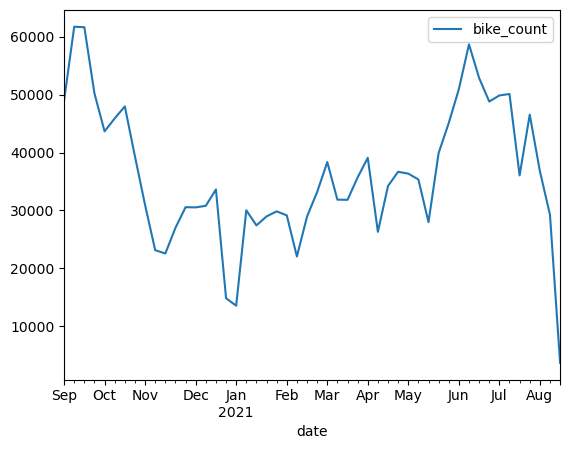

In [24]:
mask = data_train["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"

data_train[mask].groupby(pd.Grouper(freq="1w", key="date"))[["bike_count"]].sum().plot()

<Axes: xlabel='date'>

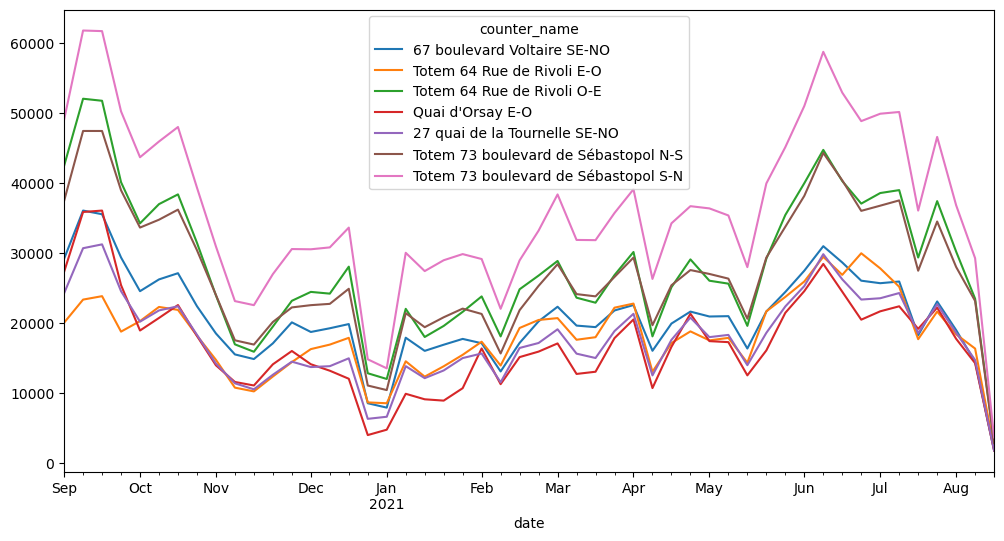

In [25]:
# We want to aggregate more counters on the same plot, we think that 7 is a good number to observe a trend.
# Find the top 10 counters by total bike count
top_counters = data_train.groupby("counter_name", observed = True)["bike_count"].sum().nlargest(7).index

# Create a mask for these top counters
mask = data_train["counter_name"].isin(top_counters)

# Group by week and plot
data_train[mask].groupby(["counter_name", pd.Grouper(freq="1w", key="date")], observed = True)["bike_count"].sum().unstack(0).plot(figsize = (12,6), legend = 'upper right')



We can see that there is a real trend based on the period, we will see why? It is probably a period of lockdown or holidays.

While at the same time, we can zoom on a week in particular for a more short-term visualization,

<Axes: xlabel='date'>

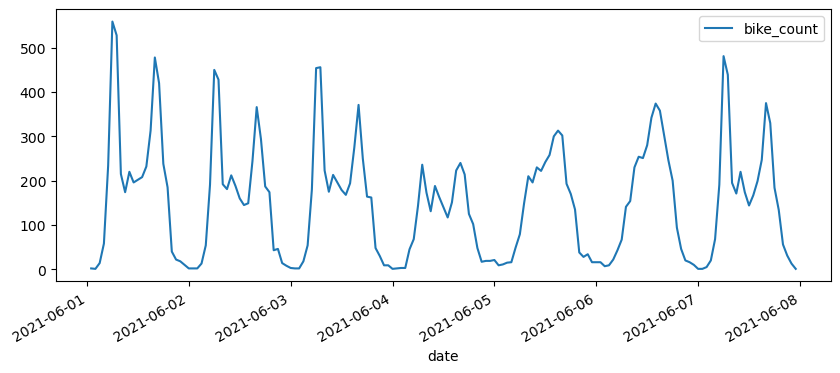

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))

mask = (
    (data_train["counter_name"] == "27 quai de la Tournelle SE-NO")
    & (data_train["date"] > pd.to_datetime("2021/06/01"))
    & (data_train["date"] < pd.to_datetime("2021/06/08"))
)

data_train[mask].plot(x="date", y="bike_count", ax=ax)

The hourly pattern has a clear variation between work days and weekends (7 and 8 March 2021).

If we look at the distribution of the target variable it skewed and non normal, 

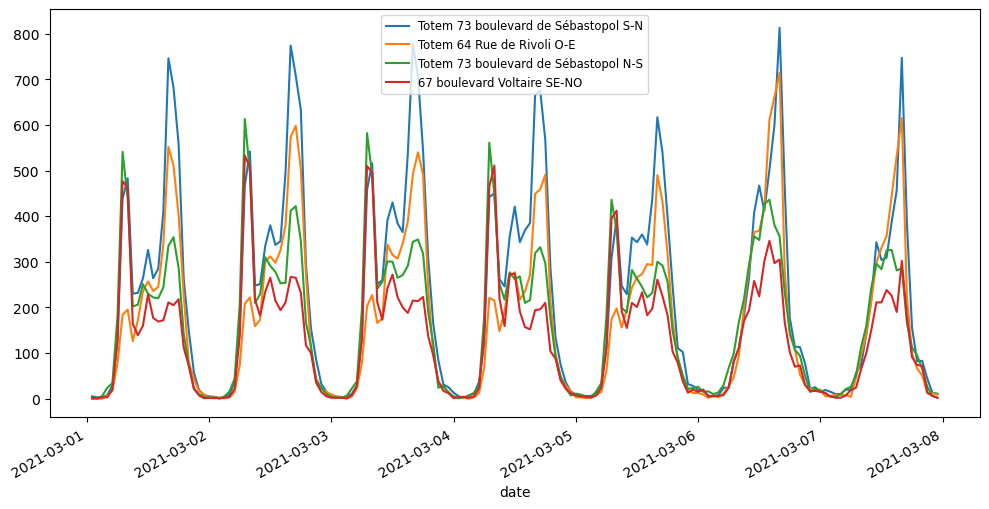

In [27]:
top_counters = data_train.groupby("counter_name", observed = True)["bike_count"].sum().nlargest(4).index

# Time frame
start_date = pd.to_datetime("2021/03/01")
end_date = pd.to_datetime("2021/03/08")

# Initialize plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each of the top counters
for counter in top_counters:
    mask = (
        (data_train["counter_name"] == counter) &
        (data_train["date"] > start_date) &
        (data_train["date"] < end_date)
    )
    data_train[mask].plot(x="date", y="bike_count", ax=ax, label=counter)

# Customize the plot
plt.legend(fontsize='small')
plt.show()


We can see that there are some counters where the peaks of the day are often in the moring while for some there often at night

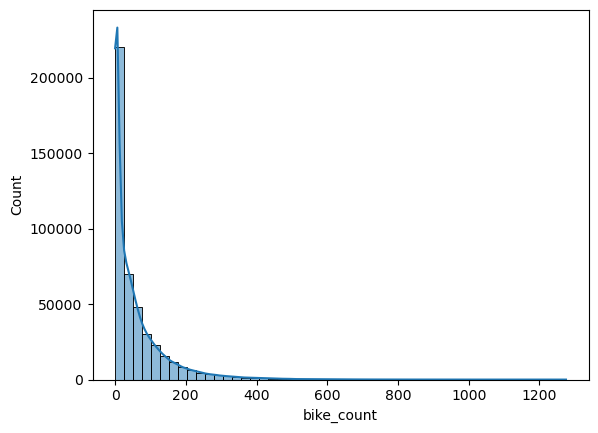

In [28]:
import seaborn as sns


ax = sns.histplot(data_train, x="bike_count", kde=True, bins=50)

Least square loss would not be appropriate to model it since it is designed for normal error distributions. One way to precede would be to transform the variable with a logarithmic transformation,
```py
data['log_bike_count'] = np.log(1 + data['bike_count'])
```

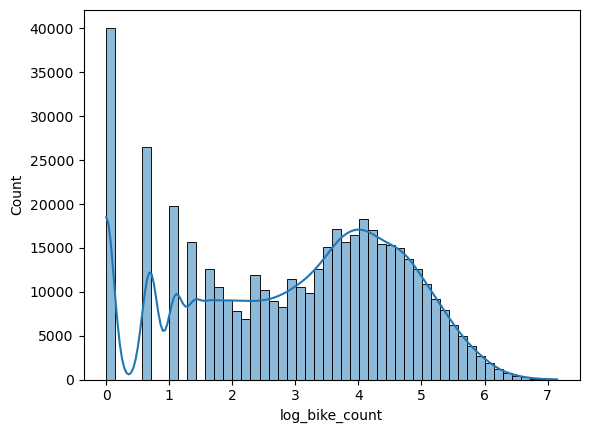

In [29]:
ax = sns.histplot(data_train, x="log_bike_count", kde=True, bins=50)

which has a more pronounced central mode, but is still non symmetric. In the following, **we use `log_bike_count` as the target variable** as otherwise `bike_count` ranges over 3 orders of magnitude and least square loss would be dominated by the few large values. 

In [30]:
import ydata_profiling 
data_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature extraction

To account for the temporal aspects of the data, we cannot input the `date` field directly into the model. Instead we extract the features on different time-scales from the `date` field, 

In [15]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "hour"] = X["date"].dt.hour

    # Finally we can drop the original columns from the dataframe
    return X.drop(columns=["date"])

In [16]:
data_train["date"].head()

48321   2020-09-01 02:00:00
48324   2020-09-01 03:00:00
48327   2020-09-01 04:00:00
48330   2020-09-01 15:00:00
48333   2020-09-01 18:00:00
Name: date, dtype: datetime64[us]

In [17]:
_encode_dates(data_train[["date"]])

,year,month,day,weekday,hour
48321,2020,9,1,1,2
48324,2020,9,1,1,3
48327,2020,9,1,1,4
48330,2020,9,1,1,15
48333,2020,9,1,1,18
...,...,...,...,...,...
928450,2021,8,8,6,18
928453,2021,8,9,0,2
928456,2021,8,9,0,8
928459,2021,8,9,0,10


To use this function with scikit-learn estimators we wrap it with [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html),

In [18]:
from sklearn.preprocessing import FunctionTransformer

date_encoder = FunctionTransformer(_encode_dates, validate=False)
date_encoder.fit_transform(data_train[["date"]]).head()

,year,month,day,weekday,hour
48321,2020,9,1,1,2
48324,2020,9,1,1,3
48327,2020,9,1,1,4
48330,2020,9,1,1,15
48333,2020,9,1,1,18


Since it is unlikely that, for instance, that `hour` is linearly correlated with the target variable, we would need to additionally encode categorical features for linear models. This is classically done with [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), though other encoding strategies exist.

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)

enc.fit_transform(_encode_dates(data_train[["date"]])[["hour"]].head())

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Linear model

Let's now construct our first linear model with [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). We use a few helper functions defined in `problem.py` of the starting kit to load the public train and test data:

In [20]:
data_test = pd.read_parquet(Path("/Users/smesguiche/bike_counters_Samuel/data/test.parquet"))

In [22]:
data_test
data_test.columns


Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'counter_technical_id', 'latitude',
       'longitude', 'log_bike_count'],
      dtype='object')

In [22]:
from sklearn.model_selection import TimeSeriesSplit

_target_column_name = "log_bike_count"

def get_cv(X, y, random_state=0):
    cv = TimeSeriesSplit(n_splits=8)
    rng = np.random.RandomState(random_state)

    for train_idx, test_idx in cv.split(X):
        yield train_idx, rng.choice(test_idx, size=len(test_idx) // 3, replace=False)

def prepare_data(data):
    # Sort by date first
    data = data.sort_values(["date", "counter_name"])
    
    # Check if target column exists in the dataset
    if _target_column_name in data.columns:
        y_array = data[_target_column_name].values
        X_df = data.drop([_target_column_name, "bike_count"], axis=1)
    else:
        y_array = None
        X_df = data.drop(["bike_count"], axis=1)
        
    return X_df, y_array


# Preparing the datasets
X_train, y_train = prepare_data(data_train)
X_test, y_test = prepare_data(data_test) 

In [23]:
X_train

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,counter_technical_id,latitude,longitude
400125,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,Y2H19070373,48.840801,2.333233
408305,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,Y2H19070373,48.840801,2.333233
87516,100036719-104036719,18 quai de l'Hôtel de Ville NO-SE,100036719,18 quai de l'Hôtel de Ville,2020-09-01 01:00:00,2017-07-12,Y2H19027732,48.853720,2.357020
98518,100036719-103036719,18 quai de l'Hôtel de Ville SE-NO,100036719,18 quai de l'Hôtel de Ville,2020-09-01 01:00:00,2017-07-12,Y2H19027732,48.853720,2.357020
875137,100063175-353277233,20 Avenue de Clichy NO-SE,100063175,20 Avenue de Clichy,2020-09-01 01:00:00,2020-07-22,Y2H20073268,48.885290,2.326660
...,...,...,...,...,...,...,...,...,...
794577,100057329-103057329,Totem 85 quai d'Austerlitz SE-NO,100057329,Totem 85 quai d'Austerlitz,2021-08-09 23:00:00,2020-02-18,YTH19111508,48.842010,2.367290
804787,100057380-104057380,Totem Cours la Reine E-O,100057380,Totem Cours la Reine,2021-08-09 23:00:00,2020-02-11,YTH19111509,48.864620,2.314440
814377,100057380-103057380,Totem Cours la Reine O-E,100057380,Totem Cours la Reine,2021-08-09 23:00:00,2020-02-11,YTH19111509,48.864620,2.314440
125899,100042374-110042374,Voie Georges Pompidou NE-SO,100042374,Voie Georges Pompidou,2021-08-09 23:00:00,2017-12-15,Y2H21025335,48.848400,2.275860


and

In [24]:
y_train

array([1.60943791, 1.38629436, 0.        , ..., 2.48490665, 1.60943791,
       1.38629436])

Where `y` contains the `log_bike_count` variable. 

The test set is in the future as compared to the train set,

In [25]:
print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Test: n_samples={X_test.shape[0]},  {X_test["date"].min()} to {X_test["date"].max()}'
)

Train: n_samples=455163,  2020-09-01 01:00:00 to 2021-08-09 23:00:00
Test: n_samples=41608,  2021-08-10 01:00:00 to 2021-09-09 23:00:00


In [26]:
_encode_dates(X_train[["date"]]).columns.tolist()

['year', 'month', 'day', 'weekday', 'hour']

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[["date"]]).columns.tolist()

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x13e883d80>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('ridge', Ridge())])

We then evaluate this model with the RMSE metric,

In [28]:
from sklearn.metrics import mean_squared_error

print(
    f"Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train), squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test), squared=False):.2f}"
)

Train set, RMSE=0.80
Test set, RMSE=0.73


The model doesn't have enough capacity to generalize on the train set, since we have lots of data with relatively few parameters. However it happened to work somewhat better on the test set. We can compare these results with the baseline predicting the mean value,

In [29]:
print("Baseline mean prediction.")
print(
    f"Train set, RMSE={mean_squared_error(y_train, np.full(y_train.shape, y_train.mean()), squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_test, np.full(y_test.shape, y_test.mean()), squared=False):.2f}"
)

Baseline mean prediction.
Train set, RMSE=1.68
Test set, RMSE=1.44


which illustrates that we are performing better than the baseline.

Let's visualize the predictions for one of the stations,

In [30]:
mask = (
    (X_test["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")
    & (X_test["date"] > pd.to_datetime("2021/09/01"))
    & (X_test["date"] < pd.to_datetime("2021/09/08"))
)

df_viz = X_test.loc[mask].copy()
df_viz["bike_count"] = np.exp(y_test[mask.values]) - 1
df_viz["bike_count (predicted)"] = np.exp(pipe.predict(X_test[mask])) - 1

Text(0, 0.5, 'bike_count')

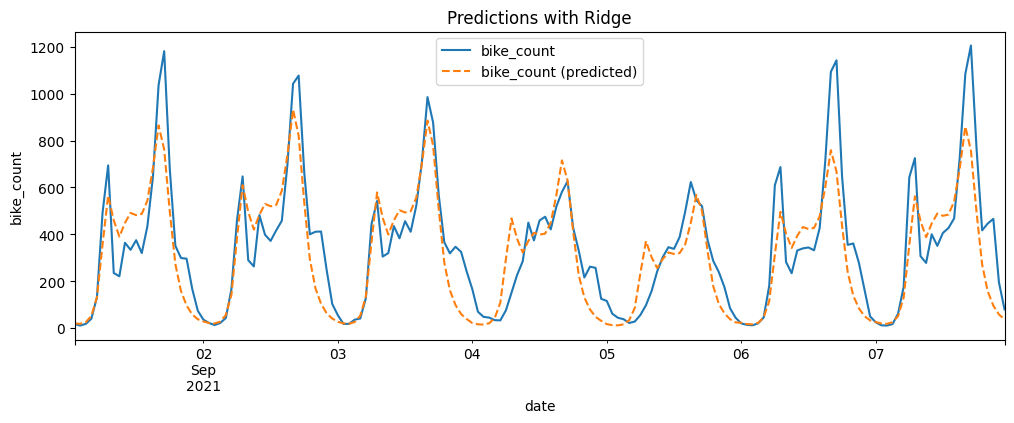

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x="date", y="bike_count", ax=ax)
df_viz.plot(x="date", y="bike_count (predicted)", ax=ax, ls="--")
ax.set_title("Predictions with Ridge")
ax.set_ylabel("bike_count")

So we start to see the daily trend, and some of the week day differences are accounted for, however we still miss the details and the spikes in the evening are under-estimated.

A useful way to visualize the error is to plot `y_pred` as a function of `y_true`,

<Axes: xlabel='y_true', ylabel='y_pred'>

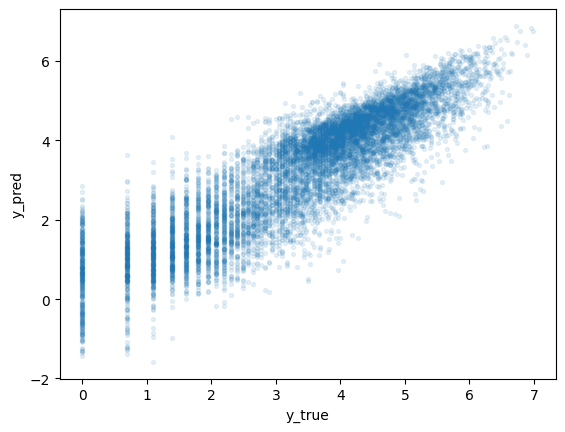

In [32]:
fig, ax = plt.subplots()

df_viz = pd.DataFrame({"y_true": y_test, "y_pred": pipe.predict(X_test)}).sample(
    10000, random_state=0
)

df_viz.plot.scatter(x="y_true", y="y_pred", s=8, alpha=0.1, ax=ax)

It is recommended to use cross-validation for hyper-parameter tuning with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or more reliable model evaluation with [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). In this case, because we want the test data to always be in the future as compared to the train data, we can use [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html),

<img src="https://i.stack.imgur.com/Q37Bn.png" />

The disadvantage, is that we can either have the training set size be different for each fold which is not ideal for hyper-parameter tuning (current figure), or have constant sized small training set which is also not ideal given the data periodicity. This explains that generally we will have worse cross-validation scores than test scores, 

In [33]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

cv = TimeSeriesSplit(n_splits=6)

# When using a scorer in scikit-learn it always needs to be better when smaller, hence the minus sign.
scores = cross_val_score(
    pipe, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
)
print("RMSE: ", scores)
print(f"RMSE (all folds): {-scores.mean():.3} ± {(-scores).std():.3}")

RMSE:  [-0.96311223 -0.869636   -0.85359085 -0.87008333 -1.06082479 -0.9729543 ]
RMSE (all folds): 0.932 ± 0.0743


In [34]:
y_pred = pipe.predict(X_test)
results = pd.DataFrame(
    dict(
        Id=np.arange(y_pred.shape[0]),
        log_bike_count=y_pred,
    )
)
results.to_csv("submission.csv", index=False)